C:\Users\idehe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 13ms/step - accuracy: 0.7469 - loss: 0.7075 - val_accuracy: 0.8507 - val_loss: 0.4168
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8729 - loss: 0.3476 - val_accuracy: 0.8819 - val_loss: 0.3362
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8928 - loss: 0.2940 - val_accuracy: 0.8968 - val_loss: 0.2873
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9058 - loss: 0.2561 - val_accuracy: 0.8830 - val_loss: 0.3287
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9122 - loss: 0.2308 - val_accuracy: 0.9001 - val_loss: 0.2845
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9232 - loss: 0.2074 - val_accuracy: 0.9022 - val_loss: 0.2660
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9282 - loss: 0.1907 - val_accuracy: 0.8974 - val_loss: 0.2743
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 13ms/step - accuracy: 0.9358 -

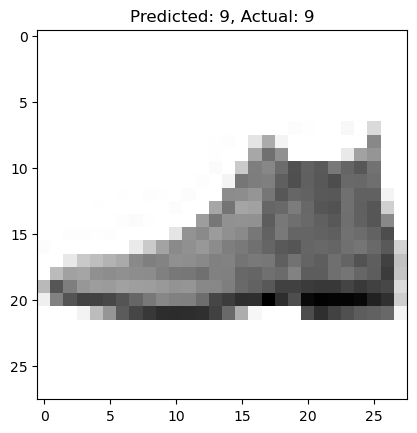

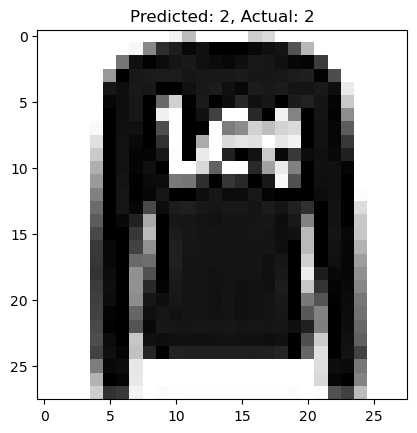

In [1]:

## Import Necessary Libraries

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist


### Load and Preprocess the Fashion MNIST Dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape data to fit the model
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))


### Build the CNN Model

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


### Compile the Model

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


## Train the Model

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


### Evaluate the Model

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')


### Make Predictions for Two Images

predictions = model.predict(test_images[:2])

print("Predictions for the first two images:", predictions)

for i, pred in enumerate(predictions):
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f"Predicted: {np.argmax(pred)}, Actual: {test_labels[i]}")
    plt.show()


In [ ]:
# RESULT INTERPRETATION

### Test Accuracy
# The output indicates: 0.9026 Test accuracy
#This means the model correctly classifies approximately 90.26% of the images in the test set. 
# It is a strong indication that the model is performing well.

### Prediction 
    # Image 1
# Predicted: 9, Actual: 9
# (Displays an image of an ankle boot)

    # Image 2
# Predicted: 2, Actual: 2
# (Displays an image of a shirt)

# Both predictions are correct. The model predicted the labels of the first two test images correctly. 
# This suggests that the model is making accurate predictions on individual samples.

### Model Performance Summary
# 1. With a test accuracy of 90.26%, we can conclude that the model is performing very well overall. 
# 2. The correct predictions on individual test images further support the model's robustness. 
# 3. Both training and validation accuracies are high and the loss is low, it confirms that the model is not overfitting.

### Conclusion
# The model is not only achieving good accuracy on the test set but is also making accurate predictions on individual samples.